In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Evaluation Projects\avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Dropping the columns which contain no data and are of no use

In [7]:
hp1=df.drop("Unnamed: 0",axis=1)
hp2=hp1.drop("Date",axis=1)
hp=hp2.drop("year",axis=1)


In [8]:
hp.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

In [9]:
hp.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
dtype: object

In [10]:
hp

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


### As type and region is object, we need to encode it so that it can be easy to classify.

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [12]:
for i in hp.columns:
    if hp[i].dtypes=="object":
        hp[i]=enc.fit_transform(hp[i].values.reshape(-1,1))

In [13]:
hp

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0


# To predict region

In [14]:
hp.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280


In [15]:
hp.corr()['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

### We see that major factors Large Bags and 4046 are positively correlated to region

<AxesSubplot:>

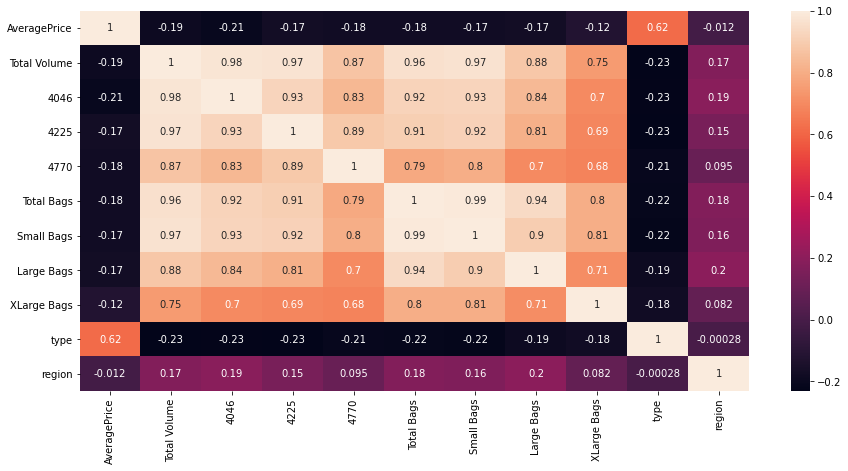

In [16]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(hp.corr(),annot=True)

In [17]:
hp.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000


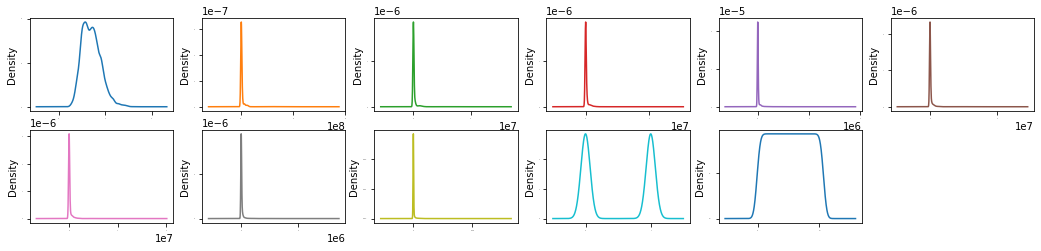

In [18]:
hp.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show()

### Now to seperate dependent and independent variables, x and y,

In [19]:
x=hp.drop("region",axis=1)
y=hp["region"]

In [20]:
x.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
type             0.000329
dtype: float64

### We see that the data is skewed and to bring the skewness in the range of (-0.5,0.5) using power transform

In [21]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [22]:
type(x_new)

numpy.ndarray

In [23]:
x=pd.DataFrame(x_new,columns=x.columns)

In [24]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836
...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164


In [25]:
x.skew().sort_values(ascending=False)

XLarge Bags     0.793520
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
AveragePrice    0.005596
type            0.000329
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
dtype: float64

In [26]:
sk=x.skew()

In [27]:
sk[np.abs(sk)>0.25].all()

True

### Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

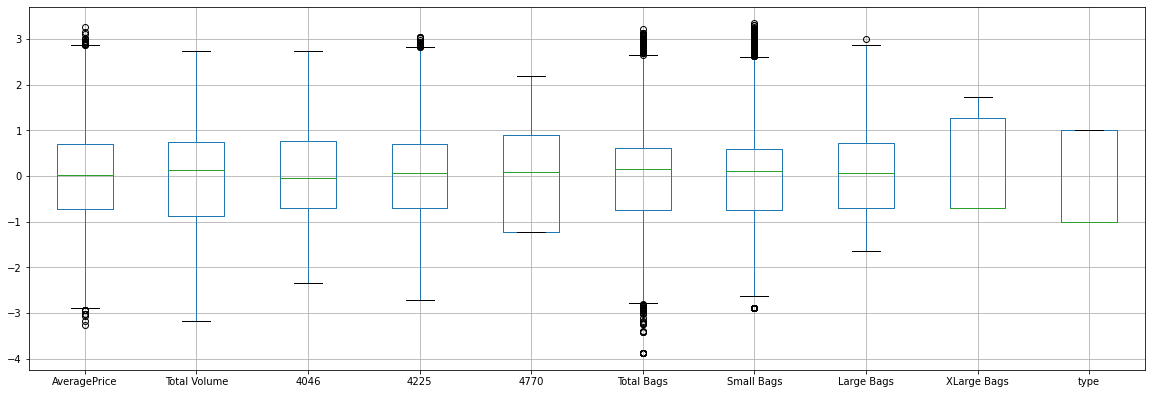

In [28]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### we see there are outliers, thus removing the outliers by bringing the z value in the range of (-3,3)

In [29]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [30]:
new_hp=pd.concat([x,y],axis=1)
new_hp

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,0.0
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,0.0
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,0.0
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,0.0
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,53.0
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,53.0
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,53.0
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,53.0


In [31]:
from scipy.stats import zscore
z=np.abs(zscore(new_hp))
new_hp=new_hp[(z<3).all(axis=1)]

In [33]:
x=new_hp.drop("region",axis=1)
y=new_hp["region"]

In [34]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836
...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164


In [35]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 18141, dtype: float64

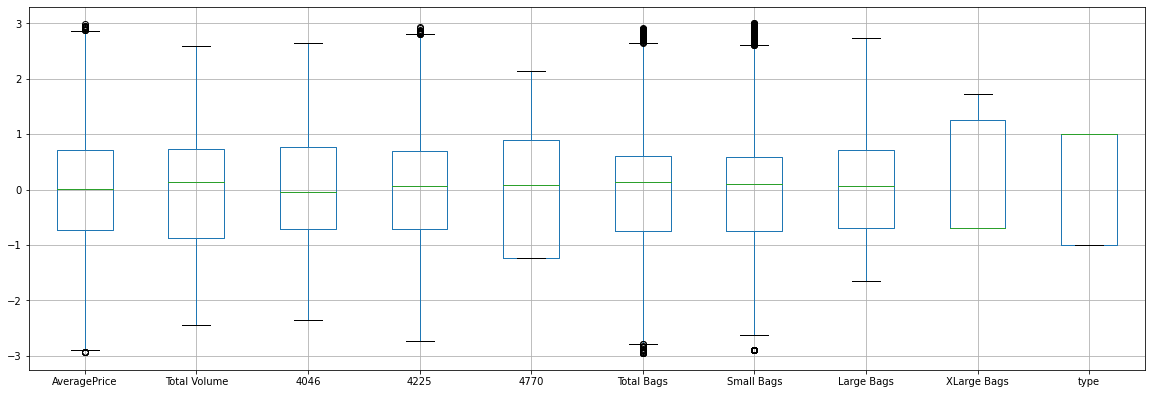

In [36]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### We see the outliers have been removed now can proceed with Modeling

### For region prediction , we use classification as region is object type and defined in categories.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [40]:
maxAcc=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.5279691375034444 on Random state 42


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
5252,-0.584545,-0.054916,0.082598,-0.015873,-0.272228,0.059266,0.196790,-1.169664,0.955491,-0.999836
9539,1.673017,-1.517457,-0.955590,-1.135209,0.413635,-1.486829,-1.158085,-1.645675,-0.699849,1.000164
4834,-1.141102,0.490884,0.665486,0.532507,0.976040,0.297170,0.422895,-1.292206,-0.699849,-0.999836
4012,-0.219440,-0.048105,-0.508705,0.145034,0.045068,0.056161,-0.377113,0.770981,-0.699849,-0.999836
11999,1.226871,-1.004519,-0.576234,-0.554709,-1.238310,-1.134333,-1.761267,-0.017893,-0.699849,1.000164
...,...,...,...,...,...,...,...,...,...,...
11374,0.859136,-0.366865,-0.259054,-0.068695,-0.712452,-0.462658,-2.473184,0.474546,-0.699849,1.000164
12062,1.380817,-0.670398,-0.701148,-0.344771,0.290463,-0.623514,-0.494055,-0.152687,-0.699849,1.000164
5392,-0.412519,-0.045583,-0.703786,0.182435,-0.878068,0.024054,0.164310,-1.645675,-0.699849,-0.999836
860,-0.643299,0.546499,0.453548,0.681012,0.640237,0.527499,0.623623,0.093113,1.543416,-0.999836


In [52]:
y_train

5252     47.0
9539      7.0
4834     38.0
4012     23.0
11999     1.0
         ... 
11374    43.0
12062     2.0
5392     49.0
860      16.0
15900    21.0
Name: region, Length: 14512, dtype: float64

In [53]:
x_test

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
17302,2.699113,-1.322475,-1.633802,-0.779832,-0.460392,-1.210859,-1.886831,-0.066217,-0.699849,1.000164
12286,0.119206,0.405993,0.183964,0.548961,-1.238310,0.464411,0.505720,0.558453,-0.699849,1.000164
11453,1.265876,-1.439047,-0.756168,-0.949453,0.365070,-1.725047,-1.351830,-1.422174,-0.699849,1.000164
6328,0.457967,0.530315,0.596288,0.194752,1.251576,0.686318,0.739097,0.063617,1.650716,-0.999836
2603,-0.526507,0.460732,0.856897,0.082234,-0.269963,0.262136,0.200660,0.671714,-0.699849,-0.999836
...,...,...,...,...,...,...,...,...,...,...
17289,1.026405,-1.141105,-0.728652,-0.999318,-1.238310,-0.839686,-0.968762,0.072992,-0.699849,1.000164
15823,0.964423,-1.566649,-1.242151,-1.243876,-1.238310,-1.180869,-0.908188,-1.128190,-0.699849,1.000164
12629,-0.086248,-0.630507,-0.713857,-0.349009,-1.238310,-0.504864,-1.186859,0.416395,-0.699849,1.000164
1533,-0.328797,1.736435,0.798367,2.102709,1.495457,1.809055,1.920090,1.271623,1.488260,-0.999836


In [54]:
y_test

17302    48.0
12286     6.0
11453    44.0
6328     13.0
2603     50.0
         ... 
17289    48.0
15823    20.0
12629    13.0
1533     29.0
10424    24.0
Name: region, Length: 3629, dtype: float64

In [55]:
x_train.shape

(14512, 10)

In [56]:
y_train.shape

(14512,)

In [57]:
x_test.shape

(3629, 10)

In [58]:
y_test.shape

(3629,)

### Once we have splitted the data into train and test data we can check the accuracy using various classifiers

### Logistic Regression

In [59]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 52.796913750344444
[[45  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  5]
 ...
 [ 0  0  0 ... 60  2  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  1  2 ...  0  0 16]]
              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        73
         1.0       0.23      0.42      0.30        60
         2.0       0.64      0.55      0.60        65
         3.0       0.46      0.37      0.41        71
         4.0       0.42      0.45      0.44        60
         5.0       0.53      0.46      0.49        72
         6.0       0.83      0.83      0.83        71
         7.0       0.59      0.55      0.57        74
         8.0       0.77      0.77      0.77        69
         9.0       0.54      0.79      0.64        68
        10.0       0.43      0.30      0.35        60
        11.0       0.52      0.59      0.55        71
        12.0       0.41      0.43      0.42        70
        13.0       0.30      0.21      0.25        66
     

### Decision Tree Clasifier

In [60]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 79.05759162303664
[[52  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  2]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  0  1 ...  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73        73
         1.0       0.62      0.67      0.64        60
         2.0       0.87      0.91      0.89        65
         3.0       0.77      0.83      0.80        71
         4.0       0.75      0.87      0.81        60
         5.0       0.65      0.72      0.68        72
         6.0       0.97      0.94      0.96        71
         7.0       0.84      0.80      0.82        74
         8.0       0.95      0.86      0.90        69
         9.0       0.74      0.75      0.74        68
        10.0       0.71      0.73      0.72        60
        11.0       0.91      0.90      0.91        71
        12.0       0.82      0.86      0.84        70
        13.0       0.65      0.73      0.69        66
      

### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 89.63901901350233
[[65  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 61]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        73
         1.0       0.81      0.85      0.83        60
         2.0       0.90      1.00      0.95        65
         3.0       0.84      0.87      0.86        71
         4.0       0.87      0.92      0.89        60
         5.0       0.89      0.82      0.86        72
         6.0       0.99      1.00      0.99        71
         7.0       0.90      0.86      0.88        74
         8.0       0.99      0.97      0.98        69
         9.0       0.87      0.88      0.88        68
        10.0       0.87      0.88      0.88        60
        11.0       0.91      0.94      0.92        71
        12.0       0.97      0.94      0.96        70
        13.0       0.85      0.86      0.86        66
      

### Support Vector Classifier

In [62]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 77.62468999724442
[[65  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 62 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  1  2 ...  0  0 46]]
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78        73
         1.0       0.43      0.53      0.47        60
         2.0       0.91      0.95      0.93        65
         3.0       0.79      0.70      0.75        71
         4.0       0.69      0.83      0.76        60
         5.0       0.88      0.60      0.71        72
         6.0       0.99      0.96      0.97        71
         7.0       0.75      0.77      0.76        74
         8.0       0.98      0.93      0.96        69
         9.0       0.73      0.91      0.81        68
        10.0       0.54      0.75      0.63        60
        11.0       0.82      0.93      0.87        71
        12.0       0.91      0.97      0.94        70
        13.0       0.65      0.64      0.64        66
      

### Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.3798030869180432


In [64]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.6694251379992665


In [65]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.5601172017768175


In [66]:
scr4=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of Support Vector Classifier is",scr4.mean())

Cross validation score of Support Vector Classifier is 0.608620013410287


### We see that the best accuracy is given by Random Forest Classifier which is 89.6% but the cross validation score is 66%, thus the model is overfitted

### Hyper Paramter Testing

In [67]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

In [68]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 34, 'max_features': 'auto'}

In [69]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.893634610085423

## Using the hyper parameter testing and Random Forest Classifier the model accuracy is 89.3% which is very good

In [125]:
import joblib
joblib.dump(GCV.best_estimator_,"Avocado.pkl")

['Avocado.pkl']

## To Predict the Average Price

In [73]:
hp

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0


### Now to seperate independent and dependent variable

In [74]:
x=hp.drop("AveragePrice",axis=1)
y=hp["AveragePrice"]

In [75]:
x.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
type             0.000329
region           0.000030
dtype: float64

In [76]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [77]:
type(x_new)

numpy.ndarray

In [78]:
x=pd.DataFrame(x_new,columns=x.columns)

In [79]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552
...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838


In [80]:
x.skew().sort_values(ascending=False)

XLarge Bags     0.793520
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
type            0.000329
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
region         -0.261443
dtype: float64

In [81]:
sk=x.skew()

In [82]:
sk[np.abs(sk)>0.25].all()

True

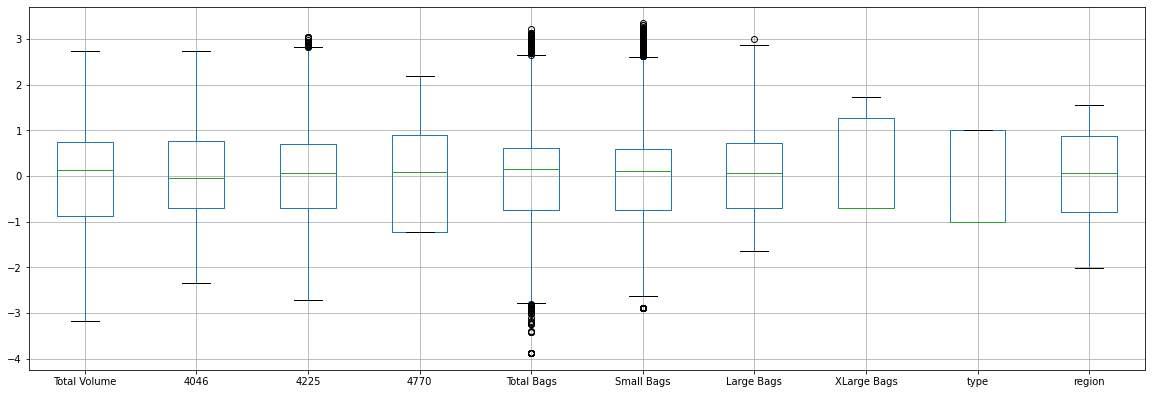

In [83]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### we see there are outliers, thus removing the outliers by bringing the z value in the range of (-3,3)

In [84]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [85]:
new_hp=pd.concat([x,y],axis=1)
new_hp

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,1.33
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,1.35
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,0.93
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,1.08
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.63
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.71
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.87
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.93


In [86]:
from scipy.stats import zscore
z=np.abs(zscore(new_hp))
new_hp=new_hp[(z<3).all(axis=1)]

In [87]:
x=new_hp.drop("AveragePrice",axis=1)
y=new_hp["AveragePrice"]

In [88]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552
...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838


In [89]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18025, dtype: float64

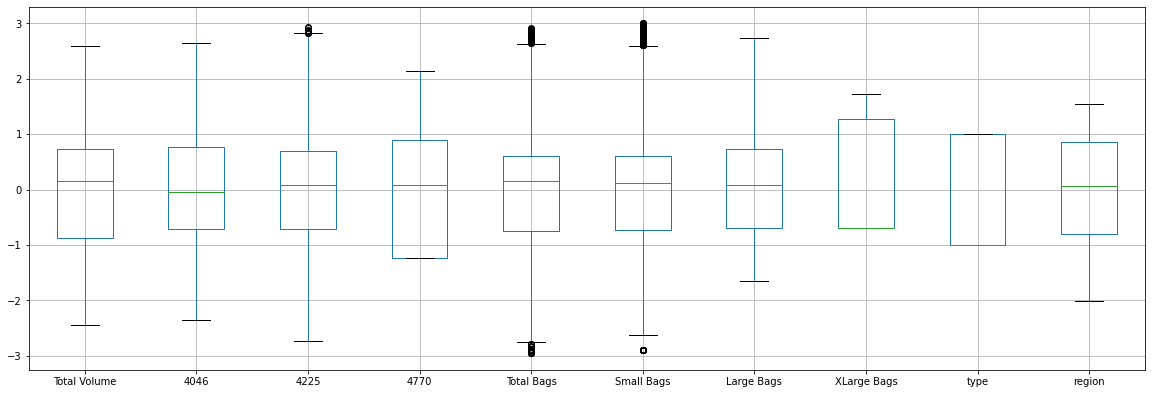

In [90]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### We see the outliers have been removed now can proceed with Modeling

## For Average price prediction, we have to do linear regression Modelling

In [91]:
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score

In [92]:
for i in range (100) :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}") 
    print("\n")

at random state 0,the training accuracy is :0.5061102002706919
at random state 0,the testing accuracy is :0.47779644622875395


at random state 1,the training accuracy is :0.4988236834818218
at random state 1,the testing accuracy is :0.5074925189548758


at random state 2,the training accuracy is :0.5037492698461791
at random state 2,the testing accuracy is :0.48816891333148493


at random state 3,the training accuracy is :0.5018938543121145
at random state 3,the testing accuracy is :0.4959317131976906


at random state 4,the training accuracy is :0.4993328472250662
at random state 4,the testing accuracy is :0.5052505156230662


at random state 5,the training accuracy is :0.5007811225714691
at random state 5,the testing accuracy is :0.5002639946319527


at random state 6,the training accuracy is :0.5016807540684844
at random state 6,the testing accuracy is :0.4966940479152123


at random state 7,the training accuracy is :0.4999247947831682
at random state 7,the testing accuracy is :0.5

### At random state 41, the testing and training accuracy is closest of 50%

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [94]:
lr.fit(x_train,y_train)

LinearRegression()

In [95]:
pred_test=lr.predict(x_test)

In [96]:
print(r2_score(y_test,pred_test))

0.5006692228795946


In [97]:
pred_test.shape

(3605,)

In [98]:
y_test.shape

(3605,)

## CROSS VALIDATION

In [99]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is -0.318717516455711 and accuracy score for training is -0.5124314423705647and accuracy score for testing is 0.5006692228795946


At cross fold 3 the cv score is -0.09845654197610616 and accuracy score for training is -0.5124314423705647and accuracy score for testing is 0.5006692228795946


At cross fold 4 the cv score is -0.14463335292447926 and accuracy score for training is -0.5124314423705647and accuracy score for testing is 0.5006692228795946


At cross fold 5 the cv score is 0.01861730427273296 and accuracy score for training is -0.5124314423705647and accuracy score for testing is 0.5006692228795946


At cross fold 6 the cv score is -0.0680804997280522 and accuracy score for training is -0.5124314423705647and accuracy score for testing is 0.5006692228795946


At cross fold 7 the cv score is -0.0005870310393946936 and accuracy score for training is -0.5124314423705647and accuracy score for testing is 0.5006692228795946


At cross fold 8 the cv score i

## Now for cross validation, the training accuracy is 51% and testing accuracy is 50% with cv=5 

## Plot the Data

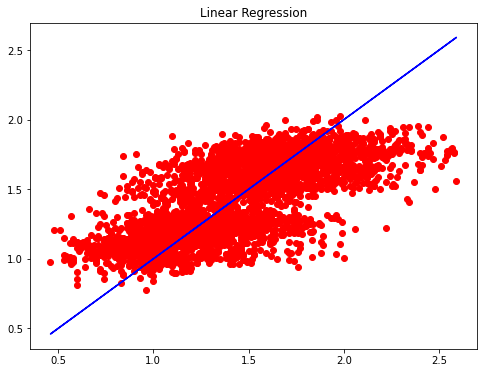

In [120]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

### Here we see that the data points are not following a linear model thus the accuracy is low, the data points are diificult to plot in a pattern

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [102]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [103]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.500640389122903

In [109]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.01861831596501897

### Thus with lasso regularization also the model accuracy remains the same of 50% as only half of the data is fitting in the mode. Also the cross validation score is 18% which is very low and this means the data is overfitted. As the training and testing accuracy is close this means that the model is good, but the data points are not sufficient to make a model of good accuracy

## Hyper parameter Testing

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [111]:
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [112]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 82.19485469323368
Cross Val Score: 7.079321048766074


### Tried RandomTreeRegressor and the testing accuracy of the model came to 82% but got cross validation score as 7% for both the models, thus dropped them as data is too little to learn or train the models.

In [113]:
import pickle

In [115]:
filename='Avocado.pkl'
pickle.dump(ls, open(filename,'wb'))

# Conclusion:

In [124]:
loaded_model= pickle.load(open('Avocado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.500640389122903


In [119]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604
predicted,1.676655,1.649137,1.559558,0.976519,1.28575,1.283708,1.071242,1.135665,1.663176,1.728951,...,1.789304,1.768391,1.791371,1.810988,1.890458,1.69814,1.77122,1.646686,1.433723,1.605065
original,1.349600,1.976500,1.613300,0.757000,1.34130,1.633600,0.998800,1.114000,1.534600,1.401700,...,1.827800,1.527400,2.199900,1.648700,1.628700,1.51500,1.60550,1.439700,1.240400,1.403000


## We see that the model accuracy is 50%, which means we need more data to train the model. Also there has to be more factors required to predict the model to achieve a better accuracy.